In [1]:
import os
import json
import ast
import time
import datetime
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from langdetect import detect


In [2]:
import pandas as pd
df = pd.read_csv('Shoes_Data.csv')

In [3]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


In [4]:
# pip install langdetect

Преобразую числовые столбики в числа (откидываю сотые части, т.к. они нули везде)

In [5]:
df = pd.read_csv('Shoes_Data.csv')
df['rating'] = [float(row.split()[0]) for row in df['rating']]

for ind, row in enumerate(df['reviews_rating']):
    splitted_row = row.split('|| ')
    score = []
    for review in splitted_row:
        review = int(review[0:1])
        score.append(review)
    df['reviews_rating'][ind] = score
    
for ind, row in enumerate(df['reviews']):
    splitted_row = row.split('|| ')
    score = []
    for review in splitted_row:
        score.append(review)
    df['reviews'][ind] = score    

df['price'] = [float(row[1:].split('.')[0]) for row in df['price']]
df['total_reviews'] = [int(row.split()[0]) for row in df['total_reviews']]

<ipython-input-5-e67a6c00cfd8>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-e67a6c00cfd8>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Размер дф не оч большой, так что лангдетек простой и удобный способ

In [6]:
for ind, descr in enumerate(df['product_description']):
    try:
        if detect(descr) != 'en':
            df = df.drop(ind)
    except: # может быть LangDetectException, но она не встает на место исключения как ошибка
        pass
df = df.reset_index(drop=True)

In [7]:
df.describe()

,price,rating,total_reviews
count,1178.000000,1178.000000,1178.000000
mean,1963.629881,3.955093,844.983871
std,1681.069712,0.460241,3180.615539
min,127.000000,1.000000,1.000000
25%,608.000000,3.800000,26.000000
50%,1509.000000,4.000000,121.000000
75%,2747.000000,4.200000,454.000000
max,7992.000000,5.000000,42193.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1178 non-null   object 
 1   price                1178 non-null   float64
 2   rating               1178 non-null   float64
 3   total_reviews        1178 non-null   int64  
 4   product_description  1178 non-null   object 
 5   reviews              1178 non-null   object 
 6   reviews_rating       1178 non-null   object 
 7   Shoe Type            1178 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.8+ KB


Корреляции довольно интересные.<p>
Чем больше цена, тем больше рейтинг.<p>
Чем больше отзывов, тем меньше цена (массовость продукта)<p>
Но чем больше пишут про продукт (в длине), тем он дороже.

In [9]:
df.corr()

,price,rating,total_reviews
price,1.000000,0.206669,-0.019507
rating,0.206669,1.000000,0.088447
total_reviews,-0.019507,0.088447,1.000000


У цен есть выбросы у дорогих товаров

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

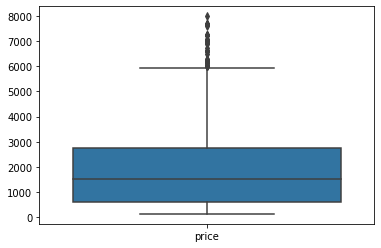

In [11]:
ax = sns.boxplot(data=df[['price']])

Рейтинги сосредоточены в 3-5 баллах, с выбросами в 1

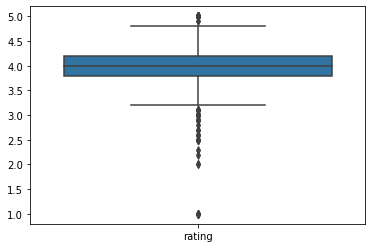

In [12]:
ax = sns.boxplot(data=df[['rating']])

Кол-во отзывов сосредеточено в 0, но есть довольно много данных 10000-25000, и выборы выше

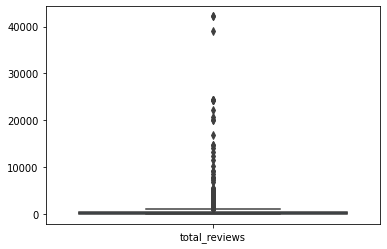

In [13]:
ax = sns.boxplot(data=df[['total_reviews']])

Я бы не назвал распределение оценок нормальным, но ничего критичного.

<AxesSubplot:>

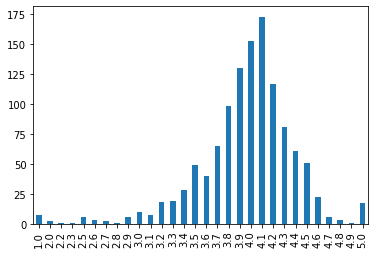

In [14]:
df['rating'].value_counts().sort_index().plot.bar()

А вот распределение цен сосредоточено в диапозоне 100-1000 евро.<p>
Могу предположить, что для дорогих товаров будут какие-то специальные слова.<p>
Или наоборот, дорогие товары не смогут предсказываться.

<AxesSubplot:>

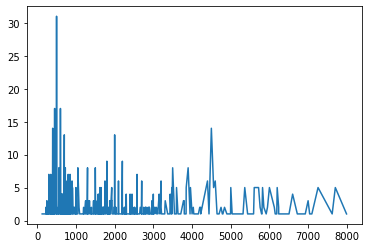

In [15]:
df['price'].value_counts().sort_index().plot()

Распределение количества отзывов тоже сосредоточено в небольших числах. <p>

<AxesSubplot:>

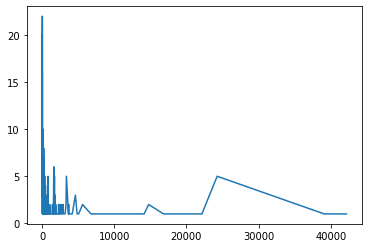

In [16]:
df['total_reviews'].value_counts().sort_index().plot()

Длина описания ожидаема похожа на другие графики.<p>
Хотя если сравнить с ценой товара, нельзя сказать, что есть корреляция между ценой и длинной описания.

In [17]:
df['product_description_len'] = [len(descr) for descr in df['product_description']]

<AxesSubplot:>

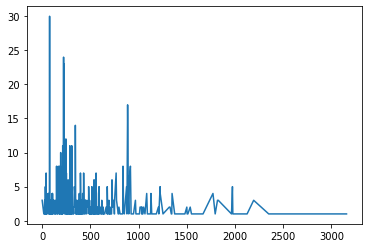

In [18]:
df['product_description_len'].value_counts().sort_index().plot()

Длина отзывов обычно короткая, но с выбросами по несколько тысяч знаков

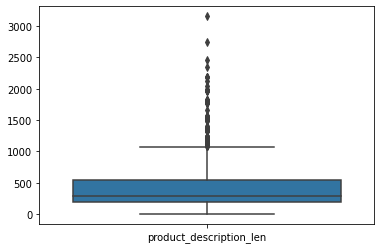

In [19]:
ax = sns.boxplot(data=df[['product_description_len']])

In [20]:
import os
from pymystem3 import Mystem
from string import punctuation
punctuation += '...' + '—' + '…' + '«»'
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, RepeatedKFold, GridSearchCV, RepeatedStratifiedKFold

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trekc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#df = pd.read_csv('Shoes_Data.csv')
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


for ind, descr in tqdm(enumerate(df['product_description'])):
    descr = [word.lower().strip().strip(punctuation) for word in nltk.word_tokenize(descr)]
    descr = [lemmatizer.lemmatize(w) for w in descr]
    descr = [word for word in descr if word != '' or word != ' ']
    descr = ' '.join([x for x in descr if x not in stopwords.words('english')])   
    df['product_description'][ind] = descr
    if df['product_description'][ind] == '':
        df = df.drop(ind)

df = df.reset_index(drop=True)

0it [00:00, ?it/s]<ipython-input-21-4a1c33a2e974>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

1178it [00:24, 48.52it/s]


In [24]:
len(list(df['price']))

1175

In [25]:
corpus = []
for row in df['product_description']:
    corpus.append(row)

vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X, list(df['price']), test_size=0.70, random_state=42)

### Функция скоринга

In [26]:
from sklearn.metrics import *
def scoring(y_test, y_pred):
    print('MRSE (0 is better): ', mean_squared_error(y_test, y_pred, squared=False))
    print('MAE (0 is better): ', mean_absolute_error(y_test, y_pred))
    print('EVS (1 is better): ', explained_variance_score(y_test, y_pred)) # 1 is better
    print('ME (0 is better): ', max_error(y_test, y_pred)) #shock
   # print('MSLE (0 is better): ', mean_squared_log_error(y_test, y_pred)) # 0 is better
    print('R2 (1 is better): ', r2_score(y_test, y_pred)) # 1 is better
    print('MAPE (0 is better): ', mean_absolute_percentage_error(y_test, y_pred)) # 0 is better

In [27]:
from sklearn.model_selection import cross_val_score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=3,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

Далее будет проблема того, как сказать модели, что нельзя негативные значения. Я хз

In [28]:
# почему-то возникала ошибка UserWarning:
# One or more of the test scores are non-finite
# но в трейне нет таких значений
import warnings
warnings.filterwarnings("ignore")

model = LinearRegression()
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['fit_intercept'] = [True, False]
space['positive'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.3849792052566849
Best Hyperparameters: {'fit_intercept': False, 'normalize': True, 'positive': False}


In [29]:
lr = LinearRegression(fit_intercept=False, normalize=True, positive=False).fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
scoring(y_test, lr_y_pred)
get_cv_scores(lr)

MRSE (0 is better):  1251.9348332329366
MAE (0 is better):  753.392944925378
EVS (1 is better):  0.448191979679594
ME (0 is better):  7053.709185497595
R2 (1 is better):  0.41959950857604134
MAPE (0 is better):  0.5423308929936851
CV Mean:  0.341758230205851
STD:  0.1478140735069901




R2

In [30]:
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5591063673902588
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [31]:
ridge = Ridge(alpha=0.1, fit_intercept=True, normalize=False, solver='sag').fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)
scoring(y_test, ridge_y_pred)
get_cv_scores(ridge)

MRSE (0 is better):  1079.6981635200377
MAE (0 is better):  705.9905883640043
EVS (1 is better):  0.568450117964598
ME (0 is better):  5628.309434717454
R2 (1 is better):  0.5683129203836184
MAPE (0 is better):  0.6054538180243917
CV Mean:  0.5471931785030754
STD:  0.1190795707021868




Я взял все параметры, но кроме альфы ничего не важно.
Использовал R2, потому что при логарифме модель не работает.

In [32]:
model = Lasso()
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
#space['positive'] = [True, False]
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
#space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]
#space['precompute'] = [True, False]
#space['selection'] = ['cyclic', 'random']

# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5292390732215473
Best Hyperparameters: {'alpha': 1}


In [33]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)
scoring(y_test, lasso_y_pred)
get_cv_scores(lasso)

MRSE (0 is better):  1161.9844170620777
MAE (0 is better):  767.6885098641906
EVS (1 is better):  0.5085536198230111
ME (0 is better):  5898.03895551672
R2 (1 is better):  0.5000058386185224
MAPE (0 is better):  0.608375503958012
CV Mean:  0.4646500611515762
STD:  0.14358011482192656




In [34]:
from sklearn.linear_model import ElasticNet

# find optimal alpha with grid search
model = ElasticNet()
param_grid = dict()
param_grid['alpha'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid['l1_ratio'] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#param_grid['fit_intercept'] = [True, False]
#param_grid['normalize'] = [True, False]
#param_grid['precompute'] = [True, False]
#param_grid['selection'] = ['cyclic', 'random']
#param_grid['positive'] = [True, False]

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.5076591870802958
Best Params:  {'alpha': 0.001, 'l1_ratio': 0.8}


In [35]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.9).fit(X_train, y_train)
elastic_y_pred = elastic_net.predict(X_test)
scoring(y_test, elastic_y_pred)
get_cv_scores(elastic_net)

MRSE (0 is better):  1083.7553003906319
MAE (0 is better):  750.3961326206022
EVS (1 is better):  0.5651030453226991
ME (0 is better):  5608.567518993834
R2 (1 is better):  0.5650625598041412
MAPE (0 is better):  0.6596355428178245
CV Mean:  0.5482010952987434
STD:  0.11421621084025918




По показателям лучшая модель Ridge. Без понятия, почему именно она справилась лучше (нам не поясняли про эти модели), но, учитывая, что на самом деле все модели показали схожий результат, это не так важно.

In [36]:
ridge_df={'price': ridge_y_pred}
lr_df={'price': lr_y_pred}
lasso_df={'price': lasso_y_pred}
elastic_df={'price': elastic_y_pred}

In [37]:
ridge_df = pd.DataFrame.from_dict(ridge_df)
lr_df = pd.DataFrame.from_dict(lr_df)
lasso_df = pd.DataFrame.from_dict(lasso_df)
elastic_df = pd.DataFrame.from_dict(elastic_df)

Если сравнивать с исходными данными, то результаты очень даже ничего.<p>
Основная масса данных в 1-3к, выбросы после 6к<p>
Основной массив данных чуть сузился, выбросов стало поменьше (но они не исчезли - то есть модель умеет их предсказывать, что очень даже хорошо)! <p>
Все модели справляются хорошо, но поточнее будет Ridge и Elastic.

Если посмотреть на линейный график, то все в принципе тоже похоже. Но я предположу, что все же небольшие выбросы моя модель не всегда угадывает, поэтому общий результат не очень.
Пик между 4-5к уловил более или менее Ridge

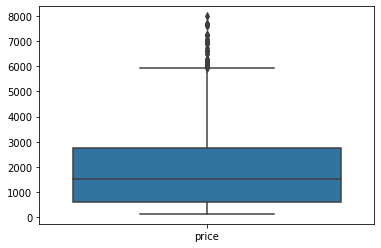

In [38]:
ax = sns.boxplot(data=df[['price']])

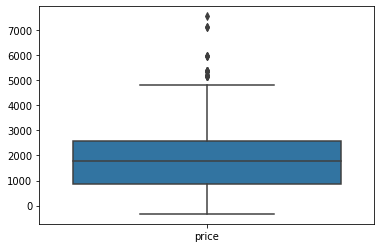

In [39]:
ax = sns.boxplot(data=ridge_df[['price']])

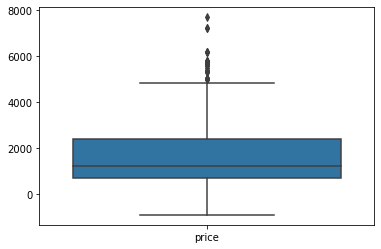

In [40]:
ax = sns.boxplot(data=lr_df[['price']])

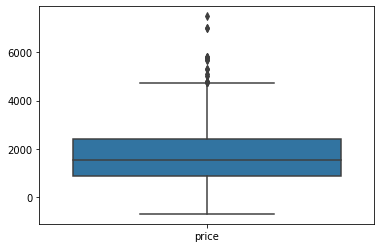

In [41]:
ax = sns.boxplot(data=lasso_df[['price']])

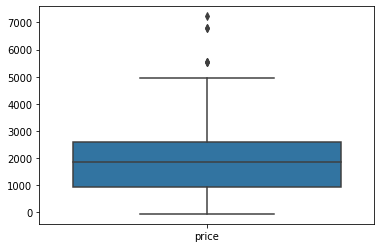

In [42]:
ax = sns.boxplot(data=elastic_df[['price']])

<AxesSubplot:>

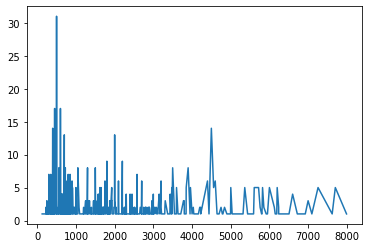

In [43]:
df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

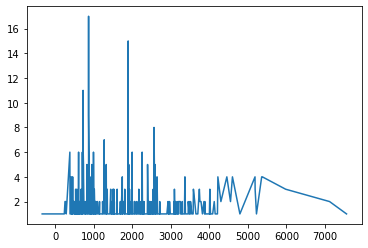

In [44]:
ridge_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

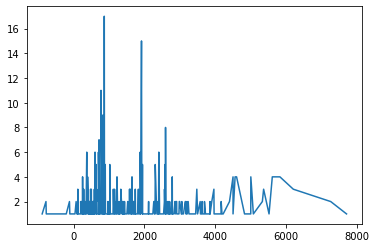

In [45]:
lr_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

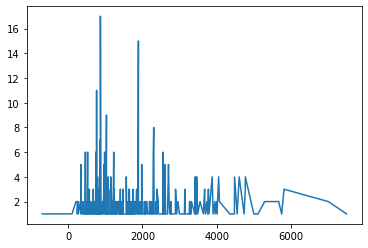

In [46]:
lasso_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

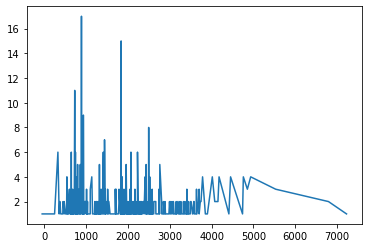

In [47]:
elastic_df['price'].value_counts().sort_index().plot()

Все модели предсказали отрицательные значения, но лучше всего справилась elastic:

In [48]:
print(df['price'].min())
print(ridge_df['price'].min())
print(lr_df['price'].min())
print(lasso_df['price'].min())
print(elastic_df['price'].min())

127.0
-333.1163332124197
-887.6428324454989
-695.4060479444674
-55.39090958193583


С макс значениями все близки, но получше будет линейная регрессия.

In [49]:
print(df['price'].max())
print(ridge_df['price'].max())
print(lr_df['price'].max())
print(lasso_df['price'].max())
print(elastic_df['price'].max())

7992.0
7557.230189326856
7702.000037081664
7493.004308897578
7229.960402516193


Я бы выбрал Ridge, потому что в общем плане он же все же ближе к истине, судя по графикам. Да и оценки модели у него лучше. Хотя, от раза в раз, показатели меняются, и иногда лучше себя показывает Elastic<br>
*Улучшить модели можно было бы, если сказать им, что нельзя предсказывать отрицательные значения. Но я не знаю как.*

# Часть 2

In [50]:
df2 = df[['reviews', 'reviews_rating']].copy()

In [51]:
revs = list()
revs = [rev for li in df2['reviews'] for rev in li]

rats = list()
rats = [rev for li in df2['reviews_rating'] for rev in li]

In [52]:
df2 = pd.DataFrame(list(zip(revs, rats)),
                  columns=['reviews', 'reviews_rating'])

In [53]:
df2

,reviews,reviews_rating
0,Not happy with product,1
1,It's not as expected.,1
2,AVERAGE PRODUCT,3
3,Pic more beautiful,3
4,Got damage product. But quality is average for...,3
...,...,...
9580,Go for it!,5
9581,Excellent product,5
9582,Nice shoe,5
9583,Nice,5


Что можно сказать? Обычно оценки либо очень хорошие, либо очень плохие

In [54]:
df2.describe()

,reviews_rating
count,9585.000000
mean,3.763380
std,1.531164
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


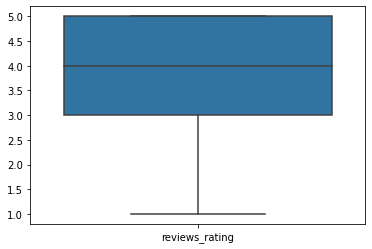

In [55]:
ax = sns.boxplot(data=df2[['reviews_rating']])

### Судя по графикам, надо использовать микро-скоринги

<AxesSubplot:>

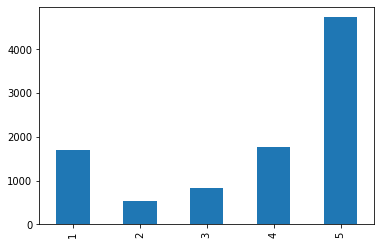

In [56]:
df2['reviews_rating'].value_counts().sort_index().plot.bar()

In [57]:
for ind, descr in tqdm(enumerate(df2['reviews'])):
    descr = [word.lower().strip().strip(punctuation) for word in nltk.word_tokenize(descr)]
    descr = [lemmatizer.lemmatize(w) for w in descr]
    descr = [word for word in descr if word != '' or word != ' ']
    descr = ' '.join([x for x in descr if x not in stopwords.words('english')])   
    df2['reviews'][ind] = descr
    if df2['reviews'][ind] == '':
        df2 = df2.drop(ind)

df2 = df2.reset_index(drop=True)

9585it [00:12, 796.16it/s] 


Попробовав разные варианты, я решил, что лучше ничего не чистить. Потому что нам в принципе не важно, на каком языке написан отзыв (может такой отзыв вообще обычно лучше оценивается). А вязи очень мало

In [58]:
def scoring2(predicted,  y2_test):
    acc = accuracy_score(predicted, y2_test)
    micro_f1 = f1_score(predicted, y2_test, average = 'micro')
    micro_p = precision_score(predicted, y2_test, average = 'micro')
    micro_r = recall_score(predicted, y2_test, average = 'micro')
    macro_f1 = f1_score(predicted, y2_test, average = 'macro')
    macro_p = precision_score(predicted, y2_test, average = 'macro')
    macro_r = recall_score(predicted, y2_test, average = 'macro')
    print('acc={0:1.4f}'.format(acc))
    print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
    print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

In [59]:
corpus2 = []
for row in df2['reviews']:
    corpus2.append(row)

In [60]:
y2 = np.array(df2['reviews_rating'])

### TF IDF

In [61]:
vect2 = TfidfVectorizer()
X2 = vect2.fit_transform(corpus2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=42)

### CountVectorizer

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vect3 = CountVectorizer()
X3 = vect3.fit_transform(corpus2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y2, test_size=0.5, random_state=42)

### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
def KNC(x_train, y_train):
    model = KNeighborsClassifier()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    #space['positive'] = [True, False]
    space['n_neighbors'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    space['weights'] = ['uniform', 'distance']
    space['p'] = [1, 2]
    space['metric'] = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']


    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [66]:
KNC(X2_train, y2_train)

Best Score: 0.5862648323804098
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [67]:
KNC(X3_train, y3_train)

Best Score: 0.601616391742791
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [69]:
clf = KNeighborsClassifier(metric='euclidean', n_neighbors=10, p=1, weights='distance').fit(X2_train, y2_train)
predicted = clf.predict(X2_test)
scoring2(predicted, y2_test)

acc=0.5845
micro F1=0.5845, micro P=0.5845, micro R=0.5845
macro F1=0.4408, macro P=0.4056, macro R=0.5612



In [70]:
clf = KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1, weights='distance').fit(X3_train, y3_train)
predicted = clf.predict(X3_test)
scoring2(predicted, y3_test)

acc=0.6196
micro F1=0.6196, micro P=0.6196, micro R=0.6196
macro F1=0.4510, macro P=0.4204, macro R=0.5703



MultinomialNB

In [73]:
from sklearn.naive_bayes import MultinomialNB

def MNB(x_train, y_train):
    model = MultinomialNB()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['class_prior'] = [None, 0, 1, 2]
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['fit_prior'] = [True, False]

    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [74]:
MNB(X2_train, y2_train)

Best Score: 0.6166936113971099
Best Hyperparameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}


In [75]:
MNB(X3_train, y3_train)

Best Score: 0.6177403667112096
Best Hyperparameters: {'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [76]:
clf = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True).fit(X2_train, y2_train)
predicted = clf.predict(X2_test)
scoring2(predicted, y2_test)

acc=0.6184
micro F1=0.6184, micro P=0.6184, micro R=0.6184
macro F1=0.4132, macro P=0.4056, macro R=0.4744



In [77]:
clf = MultinomialNB(alpha=1, class_prior=None, fit_prior=True).fit(X3_train, y3_train)
predicted = clf.predict(X3_test)
scoring2(predicted, y3_test)

acc=0.6192
micro F1=0.6192, micro P=0.6192, micro R=0.6192
macro F1=0.3903, macro P=0.3842, macro R=0.5189



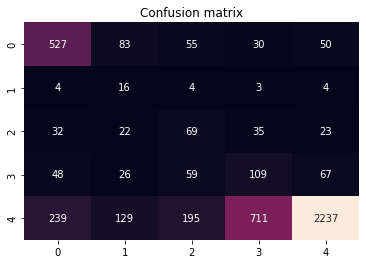

In [78]:
sns.heatmap(data=confusion_matrix(predicted, y3_test), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

def LR(x_train, y_train):
    model = LogisticRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['penalty'] = ['l1', 'l2', 'elasticnet', 'none']
    space['dual'] = [True, False]
    space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['fit_intercept'] = [True, False]
    space['solver'] = ['newton-cg', 'lbfgs', 'iblinear' 'sag', 'saga']
    space['multi_class'] = ['auto', 'ovr', 'multinomial']
    space['warm_start'] = [True, False]
    space['l1_ratio'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
 
    
    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
LR(X2_train, y2_train)

In [ ]:
LR(X3_train, y3_train)

# Новое

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [ ]:
parameters = dict()
parameters['vectorizer__ngram_range'] = [(1, 1), (1, 2), (2, 2), (2, 1)]
parameters['tfidf__use_idf'] = (True, False)
parameters['clf__estimator__alpha'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters['fit_prior'] = (True, False)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
break

In [ ]:
vect = TfidfVectorizer()
#X = vect.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(df['product_description'].values, list(df['price']), test_size=0.7, random_state=42)

In [ ]:
seed = 101
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

In [ ]:
for ind, descr in tqdm(enumerate(df2['reviews'])):
    try:
        if detect(descr) != 'en':
            df2 = df2.drop(ind)
            print(detect(descr))
            print([descr])
    except: # может быть LangDetectException, но она не встает на место исключения как ошибка
        pass
df2 = df2.reset_index(drop=True)

In [ ]:
vect = TfidfVectorizer()
start = time.time()
X_train_vect = vect.fit_transform(X_train)
end = time.time()

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [ ]:
model = SGDRegressor(loss='squared_epsilon_insensitive', penalty='l2', random_state=42, max_iter=30)
params = {'penalty':['none','l2','l1'],
          'alpha':[1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='explained_variance',
                  n_jobs=-1,
                  cv=cv,
                  verbose=3)

gs.fit(X_train_vect, y_train)

model = gs.best_estimator_
print(gs.best_params_)
print(gs.best_score_)
pipe = Pipeline([('vect',vect),('model',model)])
y_pred = pipe.predict(X_test)
scoring(y_test, y_pred)